## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

## Data Reading

Reading the 1341 case dignity dataset

In [3]:
df = pd.read_csv("df_dataset.csv", index_col=0)
df.head().T

,0,1,2,3,4
itemid,001-209033,001-153349,001-104911,001-150648,001-83882
docname,CASE OF HANDZHIYSKI v. BULGARIA,CASE OF NALBANDYAN v. ARMENIA,CASE OF R.R. v. POLAND,CASE OF CIORCAN AND OTHERS v. ROMANIA,CASE OF PETROPOULOU-TSAKIRIS v. GREECE
appno,10783/14,9935/06;23339/06,27617/04,29414/09;44841/09,44803/04
judgementdate,06/04/2021 00:00:00,31/03/2015 00:00:00,26/05/2011 00:00:00,27/01/2015 00:00:00,06/12/2007 00:00:00
law,### THE LAW\n\n- ALLEGED VIOLATION OF ARTICLE ...,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,### THE LAW\n\n- 90. The applicant complained...,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,### THE LAW\n\n- I. ALLEGED VIOLATION OF ARTI...
facts,THE FACTS 2. The applicant was born in 1971 a...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 6....,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....
conclusion,"### FOR THESE REASONS, THE COURT\n\n- Declares...","### FOR THESE REASONS, THE COURT UNANIMOUSLY\n...","### FOR THESE REASONS, THE COURT\n\n- 1. Join...","### FOR THESE REASONS, THE COURT, UNANIMOUSLY,...","### FOR THESE REASONS, THE COURT\n\n- 1. Join..."
full_text,FOURTH SECTIONCASE OF HANDZHIYSKI v. BULGARIA(...,THIRD SECTION CASE OF NALBANDYAN v. ARMENIA (A...,FOURTH SECTION CASE OF R.R. v. POLAND (Applica...,THIRD SECTION CASE OF CIORCAN AND OTHERS v. RO...,FIRST SECTION CASE OF PETROPOULOUTSAKIRIS v. G...
judgement_type,CHAMBER,CHAMBER,CHAMBER,CHAMBER,CHAMBER
textrank_summary,['Following parliamentary elections on 12 May ...,"['In doing so, the examined and dismissed the ...","['The Assembly also notes that, in member stat...",['The following twentytwo applicants: Ştefan B...,"['On 1 May 2002 two police officers, the head ..."


Reading the full 16000 row dataset for the article violation information

In [4]:
df_all = pd.read_csv("../data/echr_data_new.csv")
df_all.head()

,itemid,docname,article,appno,judgementdate,law,facts,conclusion,full_text,judgements vs decisions,judgement_type
0,001-95845,CASE OF POPOVIC v. SERBIA,"['p1-1', '13']",33888/05,24/11/2009 00:00:00,### THE LAW\n\n- I. THE APPLICANT'S DEATH\n ...,### THE FACTS\n\n- I. THE CIRCUMSTANCES OF TH...,"### FOR THESE REASONS, THE COURT UNANIMOUSLY\n...",SECOND SECTION CASE OF МILICA POPOVIĆ v. SERBI...,JUDGMENTS,CHAMBER
1,001-209033,CASE OF HANDZHIYSKI v. BULGARIA,"['35', '41', '10']",10783/14,06/04/2021 00:00:00,### THE LAW\n\n- ALLEGED VIOLATION OF ARTICLE ...,### THE FACTS\n\n- 2. The applicant was born ...,"### FOR THESE REASONS, THE COURT\n\n- Declares...",FOURTH SECTIONCASE OF HANDZHIYSKI v. BULGARIA(...,JUDGMENTS,CHAMBER
2,001-178343,CASE OF ZUBKOV AND OTHERS v. RUSSIA,"['41', '8', '5', '35', '37']",29431/05;7070/06;5402/07,07/11/2017 00:00:00,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,### THE FACTS\n\n- I. THE CIRCUMSTANCES OF TH...,"### FOR THESE REASONS, THE COURT, UNANIMOUSLY,...",THIRD SECTION CASE OF ZUBKOV AND OTHERS v. RUS...,JUDGMENTS,CHAMBER
3,001-84572,CASE OF RYGALSKI v. POLAND,['6'],11101/04,22/01/2008 00:00:00,### THE LAW\n\n- I. ALLEGED VIOLATION OF ARTI...,### THE FACTS\n\n- I. THE CIRCUMSTANCES OF TH...,"### FOR THESE REASONS, THE COURT UNANIMOUSLY\n...",FOURTH SECTION CASE OF RYGALSKI v. POLAND (App...,JUDGMENTS,CHAMBER
4,001-112534,CASE OF TYAGUNOVA v. RUSSIA,"['3', '8']",19433/07,31/07/2012 00:00:00,### THE LAW\n\n- I. ALLEGED VIOLATION OF ARTI...,### THE FACTS\n\n- I. THE CIRCUMSTANCES OF TH...,"### FOR THESE REASONS, THE COURT UNANIMOUSLY\n...",FIRST SECTION CASE OF TYAGUNOVA v. RUSSIA (App...,JUDGMENTS,CHAMBER


Merge the two datasets on itemid to the get the articles for each dignity dataset case

In [21]:
df_merged = pd.merge(df, df_all[['itemid', 'article']], on='itemid', how='left')
df_merged.head()

,itemid,docname,appno,judgementdate,law,facts,conclusion,full_text,judgement_type,textrank_summary,...,textrank_ne_removed,cleaned_facts,cleaned_bertsum,cleaned_textrank,cleaned_facts_pos_removed,cleaned_bertsum_pos_removed,cleaned_textrank_pos_removed,respondent,caseyear,article
0,001-209033,CASE OF HANDZHIYSKI v. BULGARIA,10783/14,06/04/2021 00:00:00,### THE LAW\n\n- ALLEGED VIOLATION OF ARTICLE ...,THE FACTS 2. The applicant was born in 1971 a...,"### FOR THESE REASONS, THE COURT\n\n- Declares...",FOURTH SECTIONCASE OF HANDZHIYSKI v. BULGARIA(...,CHAMBER,['Following parliamentary elections on 12 May ...,...,"['Following parliamentary elections on , on ...",. born lives . represented . Ekimdz...,"['Together, provided majority total ...","['Following parliamentary elections , new ...",". lives . . Ekimdzhiev , lawyers . . Agent , ....","[ 'Together , majority members . ' , ' another...","[ elections , , Plamen ( whose member – ) , me...",BULGARIA,2021,"['35', '41', '10']"
1,001-153349,CASE OF NALBANDYAN v. ARMENIA,9935/06;23339/06,31/03/2015 00:00:00,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT UNANIMOUSLY\n...",THIRD SECTION CASE OF NALBANDYAN v. ARMENIA (A...,CHAMBER,"['In doing so, the examined and dismissed the ...",...,"['In doing so, the examined and dismissed the ...",". CIRCUMSTANCES . applicants born , ...",[' applicants formally arrested connec...,"[' , examined dismissed applicants’ all...",". CIRCUMSTANCES . applicants , respectively . ...",[ ' applicants formally connection murder . ' ...,"[ ' , applicants allegations grounds : ( ) all...",ARMENIA,2015,"['3', '6']"
2,001-104911,CASE OF R.R. v. POLAND,27617/04,26/05/2011 00:00:00,### THE LAW\n\n- 90. The applicant complained...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 6....,"### FOR THESE REASONS, THE COURT\n\n- 1. Join...",FOURTH SECTION CASE OF R.R. v. POLAND (Applica...,CHAMBER,"['The Assembly also notes that, in member stat...",...,"['The also that, in member where abortion i...",. CIRCUMSTANCES . born . . Early v...,"[' admitted ., within covered , ...","[' , member abortion permitted number...",". CIRCUMSTANCES . . . B . . , ( later ) . , B....","[ ' . , within , advice . ' , ' doctors B. , R...","[ ' , member abortion number reasons , always ...",POLAND,2011,"['41', '3', '8', '35', '34']"
3,001-150648,CASE OF CIORCAN AND OTHERS v. ROMANIA,29414/09;44841/09,27/01/2015 00:00:00,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT, UNANIMOUSLY,...",THIRD SECTION CASE OF CIORCAN AND OTHERS v. RO...,CHAMBER,['The following twentytwo applicants: Ştefan B...,...,"[' applicants: , , , , , (Biga), , , , (Big...",. CIRCUMSTANCES . applicants thirtyseven...,"[' considered require medical treatment.',...","[' applicants: , , , , , (Biga), , , , (Big...",. CIRCUMSTANCES . applicants nationals . neigh...,"[ ' treatment . ' , ' certificate , wound exco...","[ ' applicants : , , , , , ( Biga ) , , , , ( ...",ROMANIA,2015,"['2', '3', '14']"
4,001-83882,CASE OF PETROPOULOU-TSAKIRIS v. GREECE,44803/04,06/12/2007 00:00:00,### THE LAW\n\n- I. ALLEGED VIOLATION OF ARTI...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT\n\n- 1. Join...",FIRST SECTION CASE OF PETROPOULOUTSAKIRIS v. G...,CHAMBER,"['On 1 May 2002 two police officers, the head ...",...,"['On police officers, the head of the secu...",. CIRCUMSTANCES . ethnic origin live...,"[' . CIRCUMSTANCES .', ' , . ., ...","[' police officers, head security po...",". CIRCUMSTANCES . origin lives , ( ) , settlem...","[ ' . CIRCUMSTANCES . ' , ' , . . , , police s...","[ ' police officers , security police station ...",GREECE,2007,"['3', '35', '41', '14']"


In [ ]:
df_merged.to_csv('df_merged.csv')

## Plots and Tables

Number of cases per judgement type

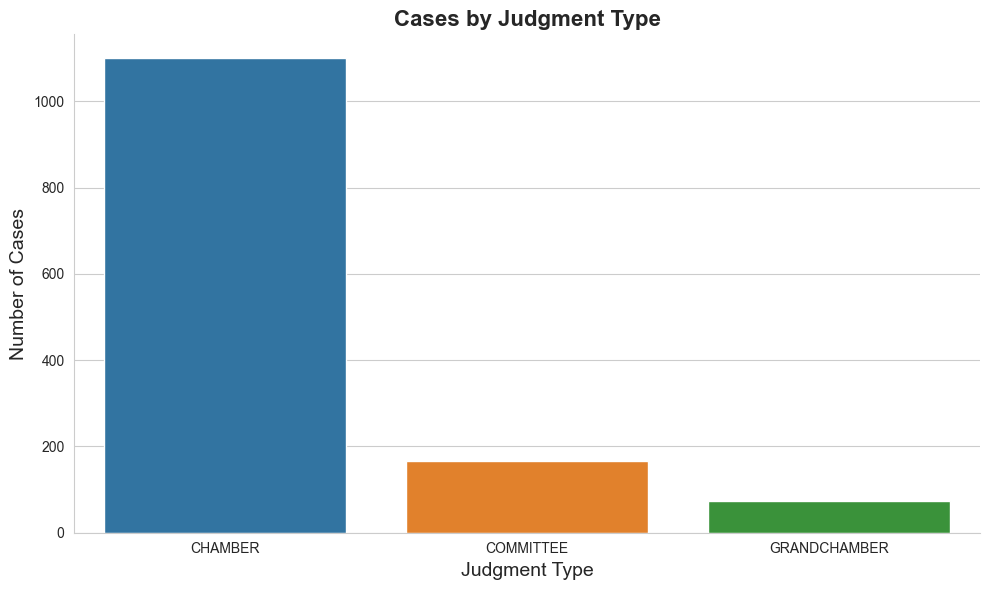

In [8]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='judgement_type', hue='judgement_type', data=df, dodge=False)

ax.set_title("Cases by Judgment Type", fontsize=16, weight='bold')
ax.set_xlabel("Judgment Type", fontsize=14)
ax.set_ylabel("Number of Cases", fontsize=14)

sns.despine()

plt.tight_layout()
plt.show()

Number of ECHR dignity cases per country

In [9]:
# Extract the country name from the case title 
df['respondent'] = df['docname'].str.extract(pat=r"(v\..+)")
df['respondent'] = df['respondent'].str.removeprefix("v. ")

In [49]:
def clean_respondent_name(name):
    # Remove parentheses and contents inside
    cleaned_name = re.sub(r'\s*\(.*?\)', '', name)
    # Remove square brackets and contents inside
    cleaned_name = re.sub(r'\s*\[.*?\]', '', cleaned_name)
    # Strip any extra whitespace that may result
    return cleaned_name.strip()

# Apply the cleaning function to the 'respondent' column
df['respondent'] = df['respondent'].apply(clean_respondent_name)

In [10]:
mostfrequent = df['respondent'].value_counts().nlargest(20).to_frame()
mostfrequent

,count
respondent,
RUSSIA,401
UKRAINE,127
ROMANIA,85
POLAND,65
TURKEY,54
HUNGARY,41
BULGARIA,39
THE UNITED KINGDOM,36
CROATIA,35


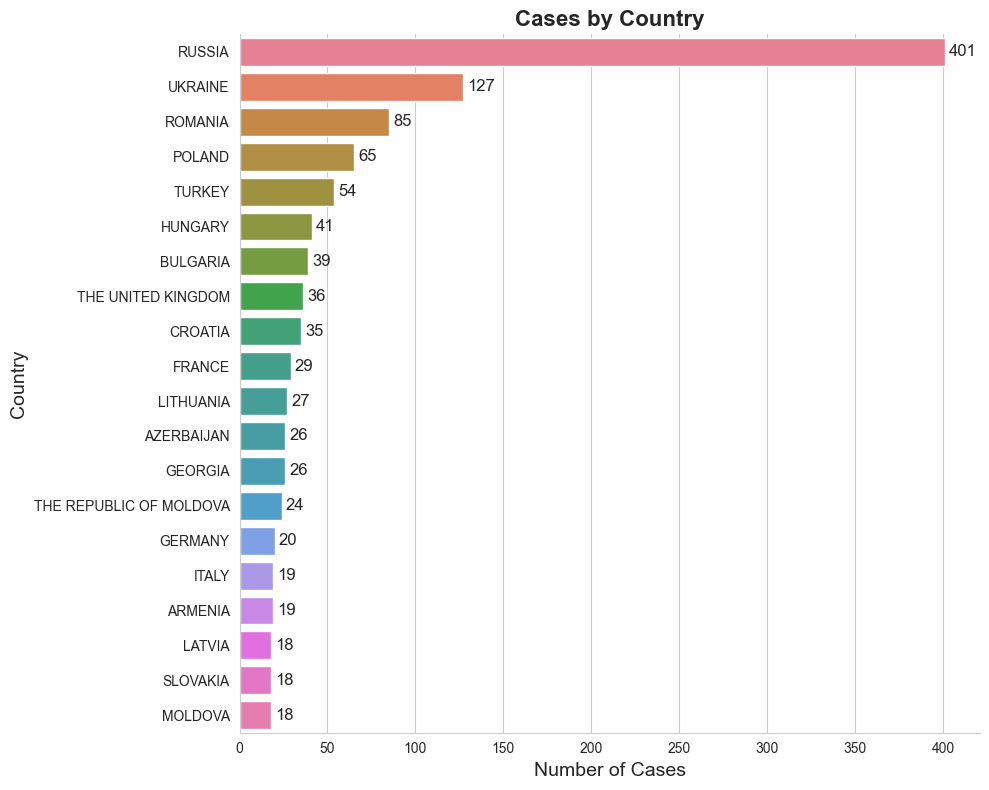

In [14]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8)) 
ax = sns.barplot(y=mostfrequent.index, x=mostfrequent['count'], hue=mostfrequent.index, dodge=False)

ax.set_title("Cases by Country", fontsize=16, weight='bold')
ax.set_xlabel("Number of Cases", fontsize=14)
ax.set_ylabel("Country", fontsize=14)


for i in ax.containers:
    ax.bar_label(i, fmt='%d', fontsize=12, padding=3)

sns.despine()

plt.tight_layout()

plt.show()

Number of ECHR dignity cases per year

In [15]:
df['caseyear'] =  pd.to_datetime(df['judgementdate'], format="%d/%m/%Y %H:%M:%S").dt.year
caseyears = df.groupby("caseyear")['itemid'].count().to_frame()
caseyears = caseyears.reset_index()

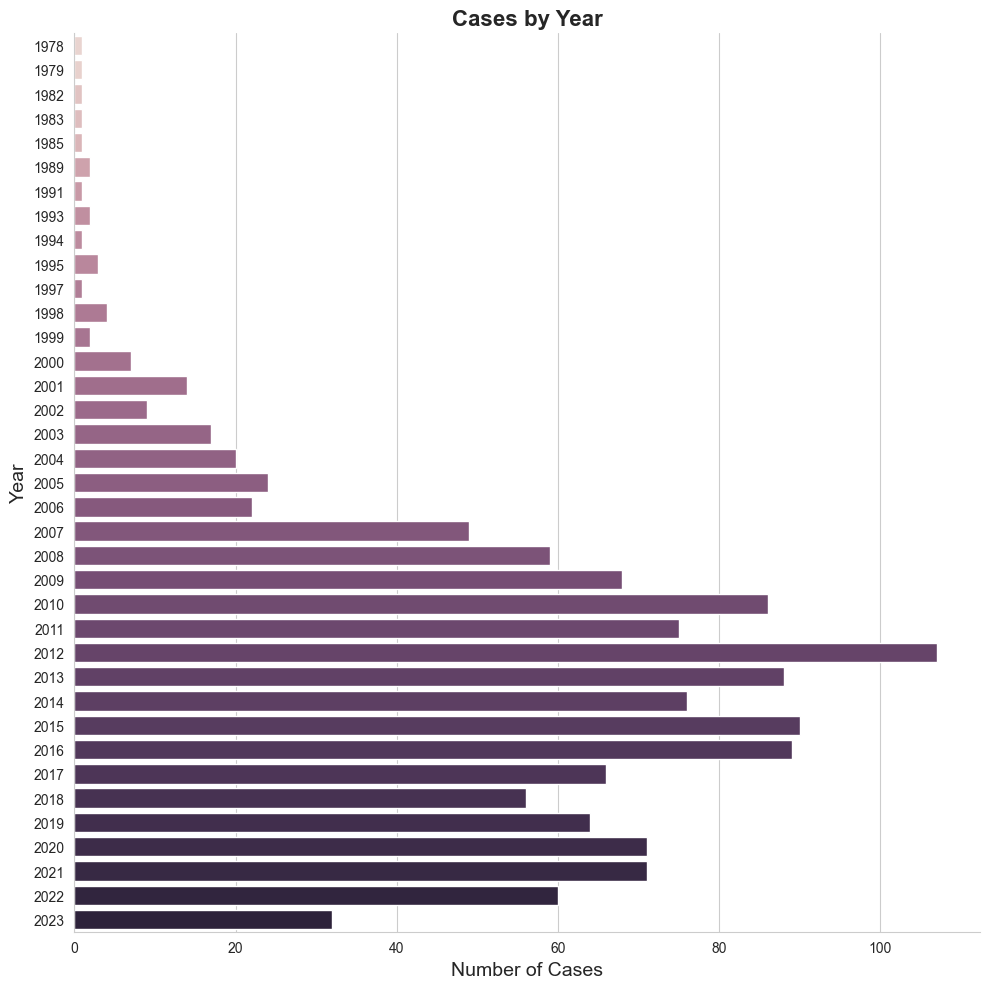

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 10))
ax = sns.barplot(y=caseyears['caseyear'].astype("category"), x=caseyears['itemid'], hue=caseyears['caseyear'], dodge=False)

ax.set_title("Cases by Year", fontsize=16, weight='bold')
ax.set_xlabel("Number of Cases", fontsize=14)
ax.set_ylabel("Year", fontsize=14)

ax.legend_.remove()

sns.despine()

plt.tight_layout()

plt.show()

Top country violator per year

In [18]:
grouped = df.groupby(['caseyear', 'respondent']).size().reset_index(name='counts')
grouped

,caseyear,respondent,counts
0,1978,THE UNITED KINGDOM,1
1,1979,BELGIUM,1
2,1982,THE UNITED KINGDOM,1
3,1983,BELGIUM,1
4,1985,THE UNITED KINGDOM,1
...,...,...,...
465,2023,AZERBAIJAN (No. 2),1
466,2023,GEORGIA,1
467,2023,POLAND,1
468,2023,ROMANIA,1


In [19]:
def get_most_frequent_respondents(grouped_df):
    result = []
    for year, group in grouped_df.groupby('caseyear'):
        if len(group) > 1:  # Skip if there is only one respondent for that year
            max_count = group['counts'].max()
            most_frequent = group[group['counts'] == max_count]
            if len(most_frequent) == 1:  # Ensure there's no tie
                result.append(most_frequent[['caseyear', 'respondent']].iloc[0])
    return pd.DataFrame(result)

In [20]:
most_frequent_respondents = get_most_frequent_respondents(grouped)
most_frequent_respondents

,caseyear,respondent
12,1995,THE UNITED KINGDOM
24,2000,TURKEY
30,2001,THE UNITED KINGDOM
38,2002,THE UNITED KINGDOM
46,2003,UKRAINE
69,2005,RUSSIA
79,2006,RUSSIA
99,2007,RUSSIA
121,2008,RUSSIA
139,2009,RUSSIA


Count of article violations

In [30]:
df_merged['article_flat'] = df_merged['article'].apply(lambda x: eval(x) if isinstance(x, str) else x)
exploded_articles = df_merged.explode('article_flat')
article_counts = exploded_articles['article_flat'].value_counts()

# Filter out articles that occur less than 3 times
filtered_article_counts = article_counts[article_counts >= 3]

print(filtered_article_counts)


article_flat
3       973
41      586
35      340
5       331
6       307
8       250
13      241
10      146
34      135
14       96
2        57
29       49
46       35
11       33
p1-1     30
9        18
1        16
38       16
p1-2     15
7        15
37       14
4        12
36       10
17        8
p4-4      8
p7-4      8
18        8
p1-3      7
12        7
p4-2      7
p7-2      6
15        3
p6-1      3
Name: count, dtype: int64


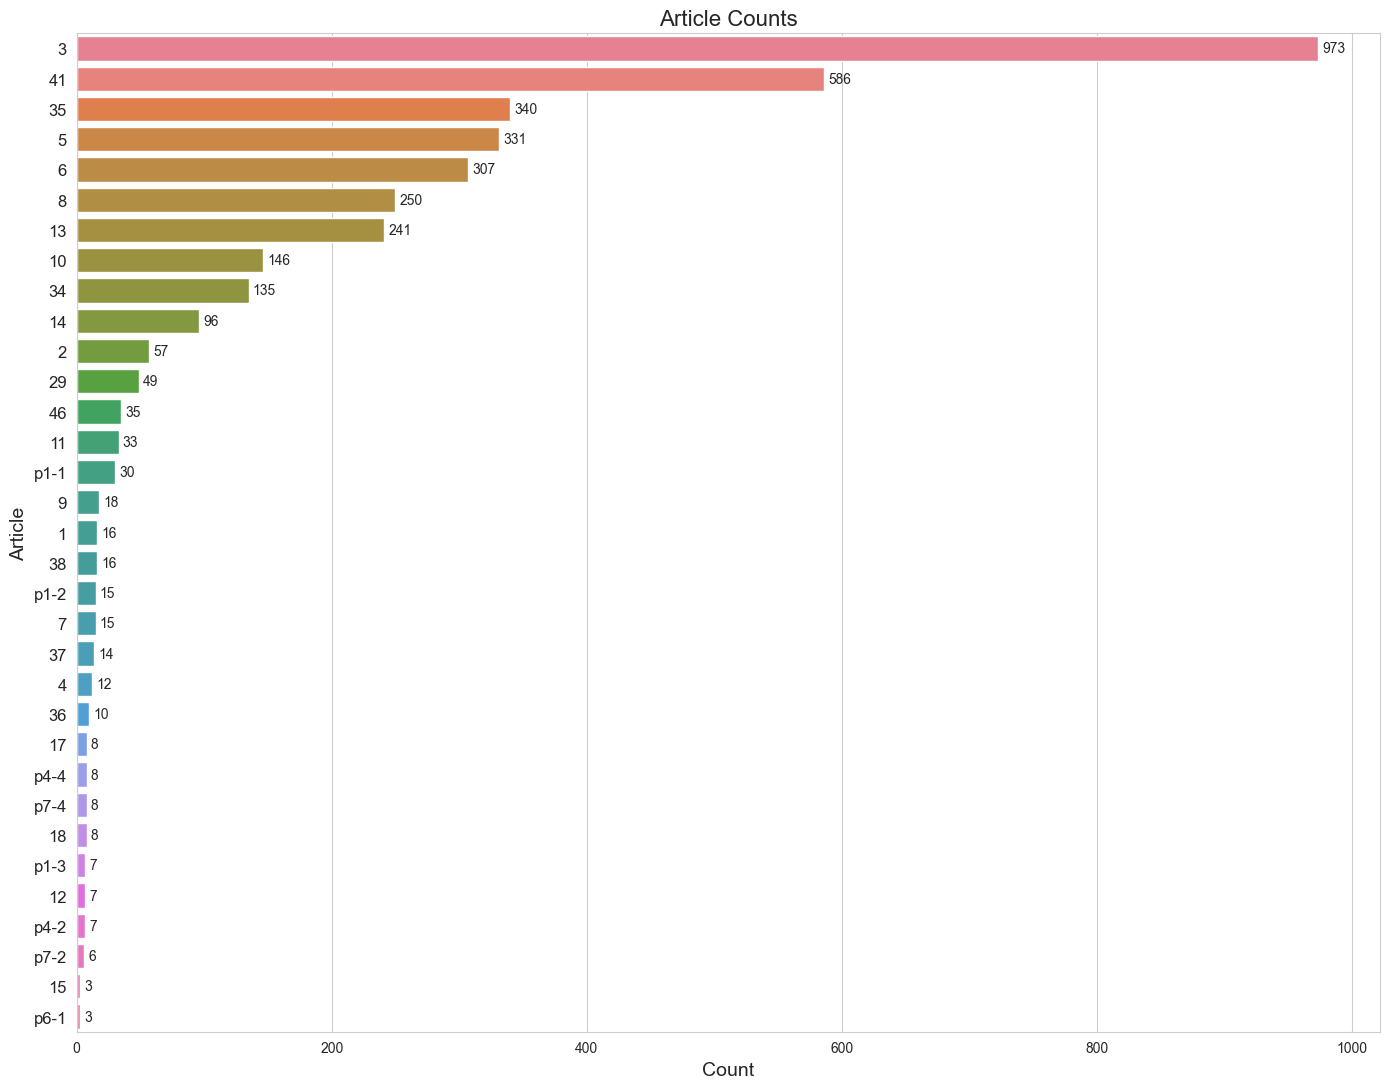

In [34]:
article_counts_df = filtered_article_counts.reset_index()
article_counts_df.columns = ['Article', 'Count']

plt.figure(figsize=(14, 11))
ax = sns.barplot(x='Count', y='Article', hue='Article', data=article_counts_df, dodge=False)

ax.set_title("Article Counts", fontsize=16)
ax.set_xlabel("Count", fontsize=14)
ax.set_ylabel("Article", fontsize=14)

plt.yticks(fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()

plt.savefig('article_violations.pdf', format='pdf', dpi=300)

plt.show()